### Introduction:
The detection of anomalies, especially in the context of smart home environments, is of significant importance for ensuring the safety and well-being of elderly individuals. The dataset used in this thesis focuses on the specific problem of detecting falls within a care-independent smart home setting. Falls are considered critical events that require immediate attention and assistance to prevent further injury or complications.

### Problem:
The main problem addressed in this dataset is the classification of events as either normal living activities or falling events. The goal is to develop a robust algorithm that can accurately identify instances of falls based on the sensor data collected from various locations on the person's body, such as the chest, ankles, and belt. By detecting falls in real-time, appropriate measures can be taken to provide timely assistance to the individual, potentially saving lives and reducing the risks associated with falls.

### Import important libraries

**numpy**: It is a fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and various mathematical functions.

**pandas**: It is a powerful data manipulation and analysis library. It provides data structures such as DataFrames that allow you to efficiently work with structured data.

**seaborn**: It is a data visualization library based on matplotlib. It provides a high-level interface for creating attractive and informative statistical graphics.

**StandardScaler**: It is a preprocessing class from scikit-learn (imported as sklearn). It is used for standardizing features by removing the mean and scaling to unit variance. This step is often performed before training machine learning models to ensure that features are on a similar scale.

**IsolationForest**: It is an anomaly detection algorithm based on the concept of isolation. It creates random forests to isolate observations that are considered as anomalies. It is a part of the scikit-learn library.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization 
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt 
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/anomaly-detection-falling-people-events/data/test/data_22.csv
/kaggle/input/anomaly-detection-falling-people-events/data/test/data_21.csv
/kaggle/input/anomaly-detection-falling-people-events/data/test/data_24.csv
/kaggle/input/anomaly-detection-falling-people-events/data/test/data_20.csv
/kaggle/input/anomaly-detection-falling-people-events/data/test/data_23.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_19.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_14.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_9.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_18.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_17.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_7.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_11.csv
/kaggle/input/anomaly-detection-falling-people-events/data/train/data_0.csv
/kaggle

### Prepare the data 

In [2]:
#train
data_0 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_0.csv')
data_1 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_1.csv')
data_2 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_12.csv')
data_3 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_13.csv')
data_4 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_14.csv')
data_5 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_15.csv')
data_6 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_16.csv')
data_7 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_17.csv')
data_8 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_18.csv')
data_9 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/train/data_19.csv')

All of the loaded CSV files (**data_0** to **data_9**) represent the training data. Each file corresponds to data from a different person observed during the experiments. These files contain the training examples that will be used to train an anomaly detection model.

In [3]:
#test 
data_20 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/test/data_20.csv')
data_21 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/test/data_21.csv')
data_22 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/test/data_22.csv')
data_23 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/test/data_23.csv')
data_24 = pd.read_csv('/kaggle/input/anomaly-detection-falling-people-events/data/test/data_24.csv')


 The test data from separate CSV files (**data_20** to **data_24**). Each file corresponds to data from a different person observed during the experiments. These files contain the test examples that will be used to evaluate the performance of the anomaly detection model trained on the training data.

Check for null values in each of the train dataset and test dataset . The isna() function is applied to each dataset, which returns a boolean dataframe indicating whether each value is null or not. The sum() function is then used to calculate the sum of null values for each column in the dataframe.

By printing the sum of null values for each dataset, you can identify if there are any missing values in the data that need to be handled before further analysis or modeling.

In [4]:
# check for the nulls  for train data 
print(f"Sum of the na value in data_0: {data_0.isna().sum()}")
print(f"Sum of the na value in data_1: {data_1.isna().sum()}")
print(f"Sum of the na value in data_2: {data_2.isna().sum()}")
print(f"Sum of the na value in data_3: {data_3.isna().sum()}")
print(f"Sum of the na value in data_4: {data_4.isna().sum()}")
print(f"Sum of the na value in data_5: {data_5.isna().sum()}")
print(f"Sum of the na value in data_6: {data_6.isna().sum()}")
print(f"Sum of the na value in data_7: {data_7.isna().sum()}")
print(f"Sum of the na value in data_8: {data_8.isna().sum()}")
print(f"Sum of the na value in data_9: {data_9.isna().sum()}")

Sum of the na value in data_0: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_1: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_2: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_3: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_4: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221 

In [5]:
#test
print(f"Sum of the na value in data_20: {data_20.isna().sum()}")
print(f"Sum of the na value in data_21: {data_21.isna().sum()}")
print(f"Sum of the na value in data_22: {data_22.isna().sum()}")
print(f"Sum of the na value in data_23: {data_23.isna().sum()}")
print(f"Sum of the na value in data_24: {data_24.isna().sum()}")

Sum of the na value in data_20: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_21: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_22: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_23: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032-221    0
020-000-033-111    0
anomaly            0
dtype: int64
Sum of the na value in data_24: x                  0
y                  0
z                  0
010-000-024-033    0
010-000-030-096    0
020-000-032

In [6]:
#check for duplicate value for train
print("Duplicated value for data_0:", data_0.duplicated().sum())
print("Duplicated value for data_1:", data_1.duplicated().sum())
print("Duplicated value for data_2:", data_2.duplicated().sum())
print("Duplicated value for data_3:", data_3.duplicated().sum())
print("Duplicated value for data_4:", data_4.duplicated().sum())
print("Duplicated value for data_5:", data_5.duplicated().sum())
print("Duplicated value for data_6:", data_6.duplicated().sum())
print("Duplicated value for data_7:", data_7.duplicated().sum())
print("Duplicated value for data_8:", data_8.duplicated().sum())
print("Duplicated value for data_9:", data_9.duplicated().sum())

Duplicated value for data_0: 0
Duplicated value for data_1: 0
Duplicated value for data_2: 0
Duplicated value for data_3: 0
Duplicated value for data_4: 0
Duplicated value for data_5: 0
Duplicated value for data_6: 0
Duplicated value for data_7: 0
Duplicated value for data_8: 0
Duplicated value for data_9: 0


In [7]:
#check for duplicate value for test
print("Duplicated value for data_20:", data_20.duplicated().sum())
print("Duplicated value for data_21:", data_21.duplicated().sum())
print("Duplicated value for data_22:", data_22.duplicated().sum())
print("Duplicated value for data_23:", data_23.duplicated().sum())
print("Duplicated value for data_24:", data_24.duplicated().sum())

Duplicated value for data_20: 0
Duplicated value for data_21: 0
Duplicated value for data_22: 0
Duplicated value for data_23: 0
Duplicated value for data_24: 0


Checking for duplicated values is important to ensure data quality and identify any potential issues with the dataset. Duplicated values can affect the accuracy of models and lead to biased results. By identifying and handling duplicated values appropriately, you can ensure the integrity and reliability of your data analysis.

Concat all the data_0 to data_9 into single one called train_data, concat all the data_20 to data24 

In [8]:
#concat the train
train_data = pd.concat([data_0, data_1, data_2, data_3, data_4, data_5,
                       data_6, data_7, data_8, data_9])

In [9]:
train_data.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,18.495860,13.766527,14.362624,0.0,0.0,0.0,1.0,0.0
1,18.501072,13.827225,14.270268,0.0,0.0,1.0,0.0,0.0
2,18.405950,13.868976,14.094804,1.0,0.0,0.0,0.0,0.0
3,18.444572,13.910701,14.116078,0.0,1.0,0.0,0.0,0.0
4,18.418470,13.933917,14.320566,0.0,0.0,0.0,1.0,0.0


In [10]:
#contcat the test 
test_data = pd.concat([data_20, data_21, data_22, data_23, data_24])

In [11]:
test_data.head()

,x,y,z,010-000-024-033,010-000-030-096,020-000-032-221,020-000-033-111,anomaly
0,6.912997,11.518698,15.471855,0.0,0.0,0.0,1.0,0.0
1,6.936432,11.574586,15.446939,0.0,0.0,1.0,0.0,0.0
2,6.935274,11.571790,15.437505,1.0,0.0,0.0,0.0,0.0
3,6.886688,11.561593,15.704019,0.0,0.0,0.0,1.0,0.0
4,6.921823,11.597728,15.634435,0.0,0.0,1.0,0.0,0.0



The updated code concatenates the test data as well, creating a dataframe called test_data. Here's the modified code:

Now, both the train and test data are concatenated using the pd.concat() function. The train data is concatenated from data_0 to data_9, and the test data is concatenated from data_20 to data_24. By concatenating the data, you create two separate dataframes, train_data and test_data, containing all the rows from the individual dataframes combined into single dataframes.

In [14]:
#feature, lable
X_train = train_data[['x', 'y']]
X_test = test_data[['x', 'y']]

(array([   74.,   384.,   731.,  1829.,  4903.,  6906., 13485., 18549.,
        18533.,  6501.]),
 array([1.90924708, 2.00763658, 2.10602608, 2.20441558, 2.30280508,
        2.40119457, 2.49958407, 2.59797357, 2.69636307, 2.79475256,
        2.89314206]),
 <BarContainer object of 10 artists>)

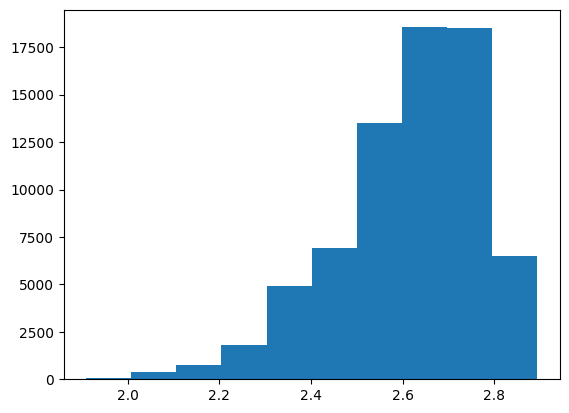

In [22]:
#convert the train_data and test_data to numpy array 
train_array = np.array(train_data)
test_array = np.array(test_data)

In [23]:
scaler = StandardScaler()
train_array_transformed = scaler.fit_transform(train_array)
test_array_transformed = scaler.transform(test_array)

Instantiates an Isolation Forest model with a contamination parameter of 0.05.

Isolation Forest is an anomaly detection algorithm that works by isolating anomalies in the data. The contamination parameter determines the expected proportion of anomalies in the data. In this case, it is set to 0.05, indicating that approximately 5% of the data is expected to be anomalous.

By setting up the Isolation Forest model with the desired contamination level, you can use it to detect anomalies in your data.

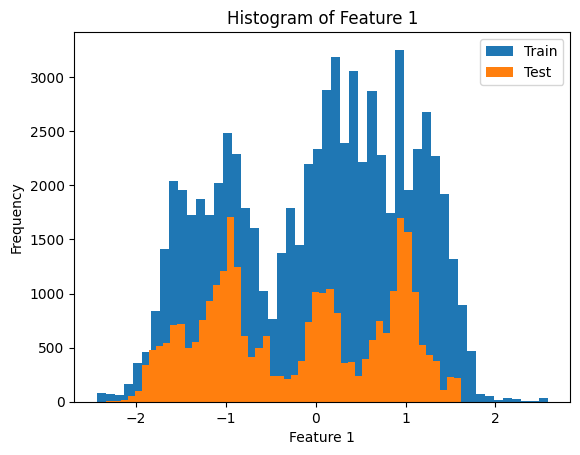

In [24]:
plt.hist(train_array_transformed[:, 0], bins=50, label='Train')
plt.hist(test_array_transformed [:, 0], bins=50, label='Test')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Histogram of Feature 1')
plt.legend()
plt.show()

In [25]:
model = IsolationForest(contamination=0.05)

In [26]:
model.fit(train_array_transformed)

IsolationForest(contamination=0.05)

fits the Isolation Forest model to the training data. This step trains the model on the provided data so that it can learn and identify patterns in normal instances and detect anomalies.

By calling the fit() method on the model object and passing the train_data as the argument, the Isolation Forest model will analyze the training data and build the necessary internal structure to identify anomalies.

Once the model is fitted, it can be used to make predictions or detect anomalies in new, unseen data (test_data).

In [27]:
pred_test = model.predict(test_array_transformed)
print(pred_test)

[1 1 1 ... 1 1 1]


In [28]:
# Mapping -1 to 0 and 1 to 1 in pred_test
pred_test_mapped = np.where(pred_test == -1, 0, 1)

In [29]:
set(pred_test_mapped)

{0, 1}

The predict() function of the Isolation Forest model is used to predict whether each sample in the test data is an outlier (anomaly) or not. It assigns an anomaly score to each sample, where a negative score indicates an outlier and a positive score indicates an inlier.

 the decision_function() method of the Isolation Forest model is used to obtain the anomaly scores for the test data.

The decision_function() method calculates the anomaly score for each sample in the test data. The anomaly score represents the degree of abnormality of each sample, where a higher score indicates a higher likelihood of being an anomaly.

The scores variable stores the anomaly scores calculated by the decision_function() method for each sample in the test data. The values in the scores array can be interpreted as follows:

Negative scores indicate that the corresponding samples are more likely to be anomalies.
Positive scores indicate that the corresponding samples are more likely to be inliers (not anomalies).
Printing scores will display the anomaly scores for each sample in the test data, providing information about their abnormality levels.

In [32]:
# Compute the confusion matrix
cm = confusion_matrix(train_array, pred_test_mapped)
print(cm)

NameError: name 'confusion_matrix' is not defined

In [ ]:
set(pred_test)

In [36]:
f1 = f1_score(test_array_transformed, pred_test_mapped)

# Print the F1-score
print(f"F1-score: {f1}")

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [34]:
gmm = GaussianMixture(n_components=2) 


In [ ]:
gmm.fit(train_array_transformed)

In [ ]:
# Calculate the probability densities for each data point in the test data
probabilities = gmm.score_samples(test_array_transformed)
probabilities

In [ ]:
# Set a threshold to classify anomalies
threshold = -5  # Adjust the threshold as needed

In [37]:
# Identify anomalies based on the threshold
anomalies = probabilities < threshold


# Calculate the F1-score
f1 = f1_score(test_array_transformed, anomalies)

# Print the F1-score
print(f"F1-score: {f1}")

NameError: name 'probabilities' is not defined